### A atividade consiste em um modelo de classificação de sentimento (sentiment analysis) para reviews de filmes do site IMDB.

As técnicas utilizadas no trabalho foram:
- Pré preparação da base usando o pacote nltk com o recurso do stopwords
- WordNetLemmatizer para padronização de linguagem
- word_tokenize utilizando o modelo de 1-gram tokenize 
- TfidfVectorizer para contabilizar as ocorrências de cada palavras
- Modelagem via Regressão Logística, Nayve Bayes e SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df

# Sendo sentimentos positivos = positive e negativo = negative

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# Separação da base de treino e teste (para validação)
train, test = train_test_split(df, test_size=0.20, random_state=5526)

# Pré processamento dos dados

In [4]:
import nltk
from nltk.corpus import stopwords
import re

In [5]:
espaco = re.compile('[/(){}\[\]\|@,;]')
simbolos = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def texto_preparacao(texto):
    texto = texto.lower()
    texto = re.sub(espaco, ' ', texto)
    texto = re.sub(simbolos, '', texto)
    texto = " ".join(filter (lambda x: x not in stopwords, texto.split()))
    return texto

In [6]:
train['review'] = [texto_preparacao(x) for x in train['review']]
train['review']

<ipython-input-6-1ef1d8e0fa1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['review'] = [texto_preparacao(x) for x in train['review']]


14439    admit fan original stage production never saw ...
13384    stallone movies like movie didnt meet low expe...
27934    ive fan things bill maher 15 years film disapp...
16660    mr kennedy stop experimenting bad movie script...
47927    may bit spoilerish side would like start sayin...
                               ...                        
6380     typical 70s soft core sex romp russ meyer genr...
40519    saw movie today opened yesterday simply deligh...
34762    watched movie say impressed creepy numerous mo...
43515    first dunno supposed use imagination film dire...
36852    george scott gave performance lifetime paddy c...
Name: review, Length: 40000, dtype: object

In [7]:
test['review'] = [texto_preparacao(x) for x in test['review']]
test['review']

<ipython-input-7-58d5df6423b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['review'] = [texto_preparacao(x) for x in test['review']]


13534    gives movie personality knowledge end true com...
15641    remembered cartoon 50 years staying power funn...
28473    movie cheesy guy gets curse turns gorilla see ...
31122    expect performances gackt hyde well done expec...
41331    war movies succeed others judged variety angle...
                               ...                        
49109    good cast best theyre given story makes sense ...
47244    thirty pieces silver kiss luck one another tot...
4528     watched movie couple days ago small independen...
43241    premise movie comedian talk show host running ...
26349    movies one redeemable quality besides ators ba...
Name: review, Length: 10000, dtype: object

In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#LEMMATIZATION
# processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item,
#identificado pelo lema da palavra, ou forma de dicionário

wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Tokenizar - separar a sentença em palavras
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [9]:
train['review'] = train['review'].apply(lambda x: lemmatizer(x))
train.head()

<ipython-input-9-2cc01ea2b8c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['review'] = train['review'].apply(lambda x: lemmatizer(x))


,review,sentiment
14439,admit fan original stage production never saw ...,negative
13384,stallone movie like movie didnt meet low expec...,negative
27934,ive fan thing bill maher 15 year film disappoi...,negative
16660,mr kennedy stop experiment bad movie script th...,negative
47927,may bite spoilerish side would like start say ...,negative


In [10]:
test['review'] = test['review'].apply(lambda x: lemmatizer(x))
test.head()

<ipython-input-10-5706e3a3a81f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['review'] = test['review'].apply(lambda x: lemmatizer(x))


,review,sentiment
13534,give movie personality knowledge end true comp...,positive
15641,remember cartoon 50 year stay power funny crea...,positive
28473,movie cheesy guy get curse turn gorilla see ba...,negative
31122,expect performance gackt hyde well do expect c...,positive
41331,war movie succeed others judge variety angle h...,positive


# Tratamento do texto usando TfidfVectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
X_train, y_train = train['review'].values, train['sentiment'].values
X_test, y_test = test['review'].values, test['sentiment'].values

In [13]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [14]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

# Análise descritiva dos dados

### Casos positivos e negativos

positive    20012
negative    19988
Name: sentiment, dtype: int64


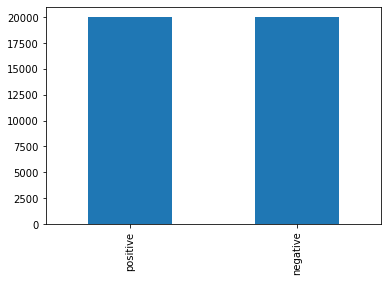

In [15]:
casos = train['sentiment'].value_counts()

casos.plot.bar()
print(casos)

# A ocasião positiva está em equilíbrio com a negativa, não será necessário técnicas de rebalanceamento de base

### Contagem de letras e palavras

In [16]:
# Contagem de letras
tags_counts = {}
# Contagem de palavras
words_counts = {}

for taglist in X_train:
    for tag in taglist:
        if tag in tags_counts:
            tags_counts[tag] += 1
        else:
            tags_counts[tag] = 1
            
for wordlist in X_train:
    for word in wordlist.split():
        if word in words_counts:
            words_counts[word] += 1
        else:
            words_counts[word] = 1
            
# count
sorted_values = sorted(words_counts.values()) # Sort the values
sorted_dict_word = {}

for i in sorted_values:
    for k in words_counts.keys():
        if words_counts[k] == i:
            sorted_dict_word[k] = words_counts[k]
            break

words = list(sorted_dict_word.items())

sorted_values = sorted(tags_counts.values()) # Sort the values
sorted_dict_tag = {}

for i in sorted_values:
    for k in tags_counts.keys():
        if tags_counts[k] == i:
            sorted_dict_tag[k] = tags_counts[k]
            break

tags = list(sorted_dict_tag.items())

In [17]:
# As palavras com maiores ocasiões são as seguintes
words[:-20:-1]

[('br', 94588),
 ('movie', 79436),
 ('film', 73682),
 ('one', 42666),
 ('make', 35054),
 ('like', 33864),
 ('see', 32656),
 ('get', 28193),
 ('good', 26181),
 ('time', 23844),
 ('character', 22124),
 ('go', 21613),
 ('watch', 20881),
 ('well', 20504),
 ('even', 19892),
 ('bad', 19455),
 ('story', 19429),
 ('would', 19118),
 ('really', 18462)]

In [18]:
# As letras com maiores ocasiões são as seguintes
tags[:-5:-1]

[(' ', 4894695), ('e', 3479786), ('a', 2121985), ('r', 2026078)]

### Term Frequency

In [19]:
palavras = list(words_counts.values())
palavras.sort(reverse=True)

In [20]:
palavras = [x/len(palavras) for x in palavras]
lista = [item for item in palavras if item >= 0.01]

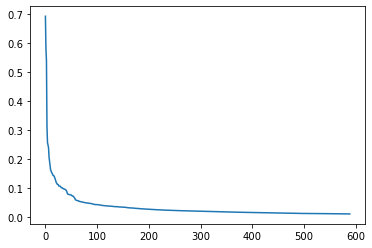

In [21]:
import matplotlib.pyplot as plt
# Term frequency para fequência superior a 5%
plt.plot(np.arange(len(lista)), lista)
plt.show()

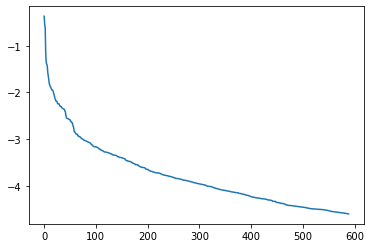

In [22]:
# log do Term frequency para fequência superior a 5%
plt.plot(np.arange(len(lista)), np.log(lista))

# Modelagem

## Regressão Logística

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

print("Acurácia:")
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)
print( " ")

print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))

Acurácia:
0.8942
 
Confusion Matrix:
 [[4452  560]
 [ 498 4490]]


## Nayve Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)

print("Acurácia:")
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)
print( " ")

print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))


Acurácia:
0.8613
 
Confusion Matrix:
 [[4409  603]
 [ 784 4204]]


# SVM

In [27]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier()
svm.fit(X_train_vectors_tfidf, y_train)

y_predict = svm.predict(X_test_vectors_tfidf)

print("Acurácia:")
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)
print( " ")

print('Confusion Matrix: \n',confusion_matrix(y_test, y_predict))

Acurácia:
0.8861
 
Confusion Matrix: 
 [[4386  626]
 [ 513 4475]]


# Conclusão

O modelo com melhor acurácia foi o de regressão logística tendo uma acurácia de 0.8942.

# Fontes de pesquisa:

- Aulas de Introdução À Big Data da FGV (lecionado pelo professor Gustavo Mirapalheta)
- https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
- https://www.coursera.org/learn/language-processing/home/welcome
- https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
- https://realpython.com/python-keras-text-classification/
- https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e